# Sistemas

## Índice 

## Objetivos del notebook 

## Clasificación de sistemas

En este contexto, un sistema puede considerarse como un proceso en el cual las señales de entrada son transformadas por el sistema o provocan que éste responda de alguna forma, lo que da como resultado otras señales de salida. Por ejemplo, un sistema de alta fidelidad toma una señal de audio grabada y genera una reproducción de dicha señal. Si el sistema de alta fidelidad tiene controles de tono, podemos cambiar la calidad en el matiz de la señal reproducida.
Un sistema continuo es aquel en el cual las señales continuas de entrada son transformadas en señales continuas de salida:

$$x(t) \rightarrow y(t)$$

De la misma manera, un sistema discreto, es uno que transforma señales de entrada discretas en salidas de tiempo discreto:

$$x[n] \rightarrow y[n]$$

¿Algún sistema que combine ambos dominios?

### Propiedades basicas de un sistema

Vamos a repasar las 4 propiedades basicas de un sistema continuo, las mismas se aplican a sistemas discretos [Kamen, Edward W., 2008]:

#### Sistemas sin y con memoria

Un sistema es **sin memoria**, si su salida para cada valor de la variable independiente en un tiempo dado depende solamente de la entrada en ese instante de tiempo.

$$S:y[n]=(2x[x]-x^2[n])^2$$

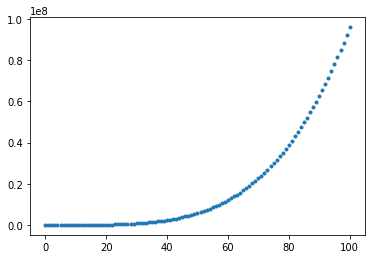

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0,101)
y = (2*x-x**2)**2

plt.plot(y, '.')

Un sistema **con memoria** posee algun mecanismo en el sistema que almacena información sobre los valores de entrada en instantes anteriores (y/o futuro) al tiempo actual.

$$S:y[n]=y[n-1]+x[n]$$

In [ ]:
x = np.ones(100);  

def S(x):
    y[0]=0+x[0]
    for n in range(1,len(x)):
        y[n] = y[n-1]+x[n]
    return y

S(x)
plt.subplot(2,1,1)
plt.plot(x, '.r')
plt.subplot(2,1,2)
plt.plot(y, '.')

#### Invertibilidad y sistemas inversos

Si un sistema es **inversible** entonces existe el sistema inverso tal que cuando esta en cascada con el sistema original produce una salida w que es igual a la entrada. Un ejemplo de sistema inversible y su inversa es:

$$S_1:y[n]=\sum_{k=0}^{n}x[k]$$

$$S_2 = S_1^{-1}$$

$$S_2:w[n]=y[n]-y[n-1]$$

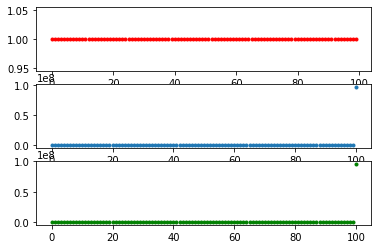

In [2]:
x = np.ones(100)

def S1(x):
    for n in range(len(x)):
        y[n] = np.sum(x[0:n+1])
    return y

def S2(y):
    w = np.zeros(len(y))
    w[0] = y[0]-0 # indice problematico y[-1]=0
    for n in range(1,len(y)):
        w[n] = y[n]-y[n-1]
    return w

plt.subplot(3,1,1)
plt.plot(x, '.r')
plt.subplot(3,1,2)
plt.plot(S1(x), '.')
plt.subplot(3,1,3)
plt.plot(S2(S1(x)), '.g')

Un ejemplo de sistema no inversible es:

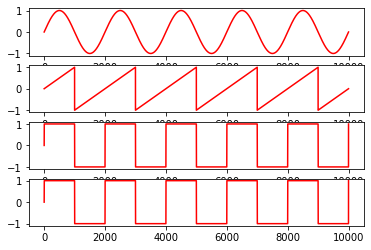

In [123]:
import scipy.signal as signal

T = 1000;
Fs = 10000;
t = np.linspace(0, T, Fs)
x1 = np.sin(2*np.pi*50*t);
x2 = signal.sawtooth(2*np.pi*50*t+np.pi);  # diente de sierra
y1 = np.sign(x1);  # funcion signo
y2 = np.sign(x2);

plt.subplot(4,1,1)
plt.plot(x1,'r')
plt.subplot(4,1,2)
plt.plot(x2,'r')
plt.subplot(4,1,3)
plt.plot(y1,'r')
plt.subplot(4,1,4)
plt.plot(y2,'r')

#### Causalidad

Un sistema es **causal** si su salida en cualquier instante de tiempo depende sólo de los valores de entrada en el momento presente y en el pasado. También se los llama no anticipativo. Todos los sistemas sin memoria son causales ya que la salida responde sólo a valores presentes de la entrada y/o salida. Un ejemplo de sistema causal.

$$S_1:y[n]=\sum_{k=0}^{n}x[k]$$

$$S_2:y[n]=x[n]+x[n-2]$$

$$S_3:y[n]=7x[n-5]$$

Dado que el sistema causal no incluye muestras de entrada futuras; dicho sistema es prácticamente realizable. Eso significa que dicho sistema puede implementarse prácticamente. En general, todos los sistemas de tiempo real son sistemas causales; porque en aplicaciones en tiempo real solo están presentes muestras presentes y pasadas. Dado que las muestras futuras no están presentes.

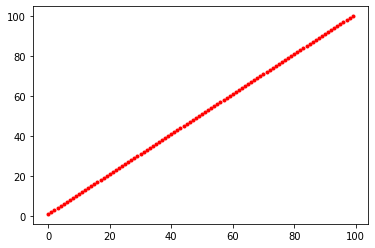

In [126]:
x = np.ones(100)

def S1(x):
    for n in range(len(x)):
        y[n] = np.sum(x[0:n+1])
    return y

plt.plot(S1(x),'.r')

Un sistema cuya respuesta presente depende de los valores futuros de las entradas se llama como un sistema **no causal**.

![](../img/no_causales.jpg)

$$S_1:y[n]=x[n+1]$$

$$S_2:y[n]=x[n]+x[n-2]$$

$$S_3:y[n]=7x[n+5]$$

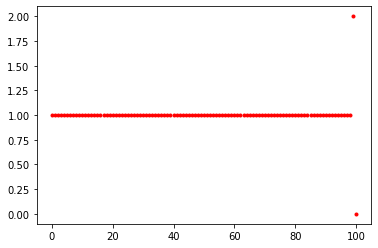

In [6]:
x = np.ones(100)
x = np.append(x,2)

def S1(x):
    for n in range(len(x)-1):
        y[n] = x[n+1]
    return y

plt.plot(S1(x),'.r')

Dado que el sistema no causal contiene muestras futuras; un sistema no causal prácticamente no es realizable. Eso significa que en casos prácticos no es posible implementar un sistema no causal.
Pero si las señales se almacenan en la memoria y posteriormente las utiliza un sistema, dichas señales se tratan como señales avanzadas o futuras. Debido a que tales señales ya están presentes, antes de que el sistema haya comenzado su operación. En tales casos, es posible implementar un sistema no causal.
Algunos ejemplos prácticos de sistemas no causales son los siguientes:

* Crecimiento de la población.

* Pronóstico del tiempo.

* Valores de acciones.

#### Estabilidad

Sabemos que un procedimiento para determinar si **un sistema es estable**, si este es LTI. es comprobar que la respuesta impulsiva tiene suma acotada, sin embargo para sistemas no LTI debemos aplicar la definición general (cualquier entrada acotada produce una salida acotada) [Olivas, Emilio Soria, 2003]. En definitiva, un sistema es estable cuando perturbaciones pequeñas de la entrada conducen a respuestas que no divergen. Ejemplo de un **sistema inestable**:

$$S_1:y[n]=nx[n]$$

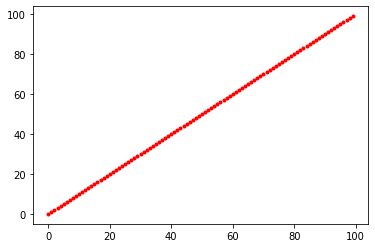

In [13]:
x = np.ones(100)

def S1(x):
    y = np.zeros(len(x))
    for n in range(len(x)):
        y[n] = n*x[n]
    return y

plt.plot(S1(x),'.r')

Un sistema estable:

$$S_2:y[n]=e^{x[n]}$$

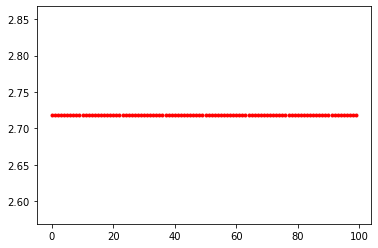

In [12]:
x = np.ones(100)

def S1(x):
    y = np.zeros(len(x))
    for n in range(len(x)):
        y[n] = np.exp(x[n])
    return y

plt.plot(S1(x),'.r')

#### Invariancia en el tiempo

Un sistema es **invariante en el tiempo** si el comportamiento y características del mismo están fijos en el tiempo. Un sistema es invariante con el tiempo si un desplazamiento temporal en la entrada ocasiona un despazamiento temporal en la salida.

$$S_1:y[n]=sen[x[n]] \qquad \text{Verificar que es invariante en el tiempo.}$$

$$S_2:y[n]=nx[n] \qquad \text{Verificar que es variante en el tiempo.}$$

#### Linealidad

Un **sistema lineal**, tanto en tiempo continuo como discreto posee la importante propiedad de superposición es decir si una entrada es la suma ponderada de varias señales la salida es la superposición de las respuestas del sistema a cada una de estas señales.

$$ ax_1[n] \rightarrow ay_1[n] \\ bx_2[n] \rightarrow by_2[n] \\ \text{Entonces: } x_3=ax_1[n]+bx_2[n]\rightarrow y_3=ay_1[n]+by_2[n] \\ $$

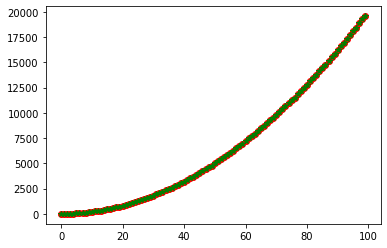

In [42]:
N = 100
alfa = 2 
beta = 0.5
    
x1 = np.arange(0,N)  # secuencia arbitraria n°1, para el estudio de la LINEALIDAD.
x2 = np.sin(2*np.pi*0.3*np.arange(0,N))  # secuencia arbitraria n°2, para el estudio de la LINEALIDAD.
x3 = alfa*x1 + beta*x2  # combinacion lineas de las secuencias n°1 y n°2, para el estudio de la LINEALIDAD.

y1,y2,y3 = np.zeros(len(x)),np.zeros(len(x)),np.zeros(len(x))

for n in range(len(x)):
    y1[n] = n*x1[n] # n+x[n]
    y2[n] = n*x2[n]
    y3[n] = n*x3[n]

plt.plot(y3,'ro')  
plt.plot(alfa*y1+beta*y2,'g*')

Veamos un ejemplo para verificar la **linealidad**, la **estabilidad** e **invarianza temporal** de un sistema discreto: 

$$y[n] = x[n]-2x[n-1]-y[n-2]$$

In [14]:
# Generamos 5 secuencia para estudiar el sistema
N = 100;
alfa = 2; beta = 0.5;
    
x1 = np.arange(0,N)  # secuencia arbitraria n°1, para el estudio de la LINEALIDAD.
x2 = np.sin(2*np.pi*0.3*np.arange(0,N))  # secuencia arbitraria n°2, para el estudio de la LINEALIDAD.
x3 = alfa*x1 + beta*x2  # combinacion lineas de las secuencias n°1 y n°2, para el estudio de la LINEALIDAD.

x4 = np.concatenate((np.ones(1), np.zeros(N-1))) # secuencia para estudiar la ESTABILIDAD.
x5 = np.concatenate((np.zeros(5), x1[1:N-4]))  # secuencia para estudiar la INVARIANZA TEMPORAL, retardando 5 muestras.

# Consideramos las siguientes condiciones iniciales n = 0 --> x [n-1]=x[-1]= 0 ; y[n-2]=y[-2]= 0.5 // n = 1 --> y[n-2]=y[-1] = 2
y_1 = 0; y_2 = 0; x_1 = 0;

# Ahora, debemos calcular las salidas para las entradas anteriores y1[n],y2[n], y3[n], y4[n], por ultimo y5[n]   

# Primero, determinamos fuera del bucle la salida para índices problemáticos n = 0 y n = 1

y1,y2,y3,y4,y5 = np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N)

# Para n = 0
n = 0
y1[n] = x1[0]-2*x_1-y_2
y2[n] = x2[0]-2*x_1-y_2
y3[n] = x3[0]-2*x_1-y_2
y4[n] = x4[0]-2*x_1-y_2
y5[n] = x5[0]-2*x_1-y_2

# Para n = 1
n = 1
y1[n] = x1[1]-2*x1[0]-y_1
y2[n] = x2[1]-2*x2[0]-y_1
y3[n] = x3[1]-2*x3[0]-y_1
y4[n] = x4[1]-2*x4[0]-y_1
y5[n] = x5[1]-2*x5[0]-y_1

# Realizamos los cálculos para n > 1
for n in range(2,N):
    y1[n] = x1[n]-2*x1[n-1]-y1[n-2]
    y2[n] = x2[n]-2*x2[n-1]-y2[n-2]
    y3[n] = x3[n]-2*x3[n-1]-y3[n-2]
    y4[n] = x4[n]-2*x4[n-1]-y4[n-2]
    y5[n] = x5[n]-2*x5[n-1]-y5[n-2]

Dibujamos las salidas

<function matplotlib.pyplot.show(*args, **kw)>

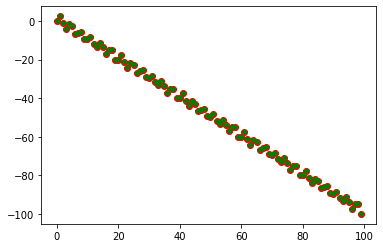

In [15]:
# Linealidad
plt.plot(y3,'ro')  
plt.plot(alfa*y1+beta*y2,'g*')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

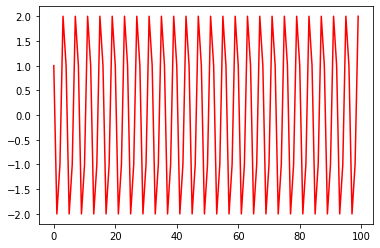

In [16]:
# Estabilidad
plt.plot(y4,'r')
plt.show

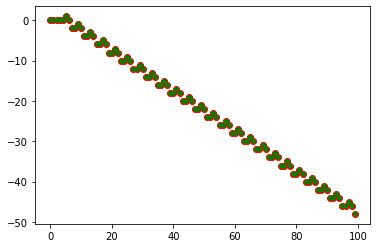

In [18]:
# Invarianza temporal
plt.plot(y5,'ro')
plt.plot(np.concatenate((np.zeros(5), y1[1:N-4])),'g*')

https://realpython.com/python-matplotlib-guide/

## Referencias

 * Kamen, Edward W., and Bonnie S. Heck. Fundamentos de señales y sistemas usando la Web y Matlab. Pearson Prentice-Hall, 2008
 * Olivas, Emilio Soria. Tratamiento digital de señales: problemas y ejercicios resueltos. Pearson Educación, 2003

## Licencia

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Licencia de Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />Este documento se destribuye con una <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">licencia Atribución CompartirIgual 4.0 Internacional de Creative Commons</a>.

Material adaptado del curso [Introducción a Python](https://github.com/infiniemlabs-acustica/python_introduccion)

© 2020. Infiniem Labs Acústica. infiniemlab.dsp@gmail.com (CC BY-SA 4.0))